# Praca domowa 6

**Autor: Anna Wawrzyńczak**

## Wstęp

Zanalizowana została ramka danych dotycząca wina czerwonego.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
sns.set(rc = {'figure.figsize': (12,7)})

In [2]:
df = pd.read_csv("winequality-red.csv").dropna().reset_index(drop = True)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Opis zbioru danych

Liczba wierszy w ramce:

In [5]:
df.shape[0]

1599

Liczba kolumn:

In [6]:
df.shape[1] 

12

Nazwy kolumn i typ danych w poszczególnych kolumnach:

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Każda kolumna zawiera dane ilościowe.

### Podsumowanie zbioru danych

Ogólne statystyki:

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


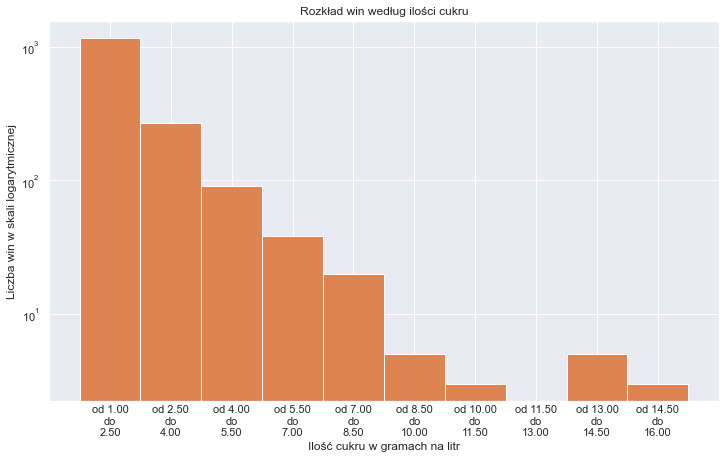

In [9]:
sugar = df["residual sugar"].to_frame()
sugar["round_num"] = [None]*len(sugar)
for i in range(0,len(sugar)-1):
         sugar["round_num"][i] = float("%.0f" % sugar["residual sugar"][i])  
sugar = sugar.dropna()

plt.hist(sugar["round_num"])
n, bins, patches = plt.hist(sugar["round_num"])

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "od {:.2f}\ndo\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
plt.tick_params(axis='x', which='both',length=0)
plt.yscale("log")

plt.title('Rozkład win według ilości cukru')
plt.xlabel("Ilość cukru w gramach na litr")
plt.ylabel("Liczba win w skali logarytmicznej")

plt.show()

Jak widać na powyższym wykresie w zbiorze danych nie ma win słodkich. Ponadto, za wina półwytrawne przyjmuje się wina, które mają od 12 do 18 gram cukru na litr, zatem stanowią one małą część analizowanych win w porównaniu do win wytrawnych.

<Figure size 864x504 with 0 Axes>

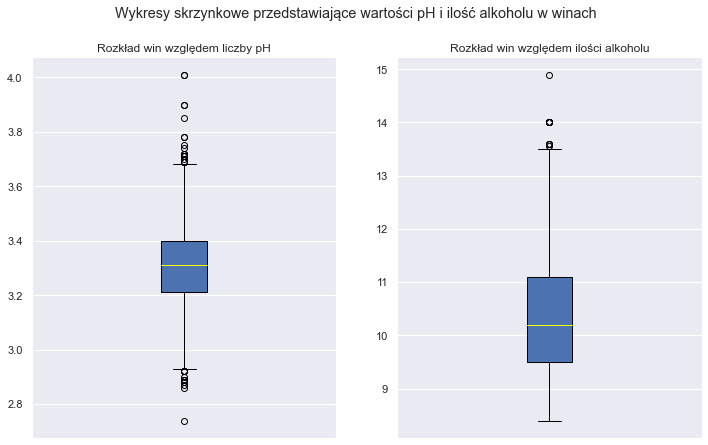

In [10]:
df1 = df[["alcohol","pH"]]

fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Wykresy skrzynkowe przedstawiające wartości pH i ilość alkoholu w winach')

b1 = ax1.boxplot(df1["pH"],patch_artist=True)
b2 = ax2.boxplot(df1["alcohol"],patch_artist=True)
ax2.set_title('Rozkład win względem ilości alkoholu')
ax1.set_title('Rozkład win względem liczby pH')
ax1.set_xticks([])
ax2.set_xticks([])
for median in b1['medians']:
    median.set_color('yellow')
for median in b2['medians']:
    median.set_color('yellow')
plt.show()

Na podstawie wykresów skrzynkowych można zauważyć, że analiza będzie dotyczyć głównie win o wartości pH w przedziale 3.2-3.4 oraz o zawartości procentowej alkoholu pomiędzy 9.5% a 11%. 

## Analiza zależności między zmiennymi w zbiorze danych

Jedną z najważniejszych cech wina jest jego wartość kwasowości lotnej, która gdy jest wysoka sprawia, że wino ma mocny zapach octu. 
Poniższy wykres przedstawia wartości kwasowości lotnej w winach względem zawartości alkoholu. Wina zostały pogrupowane według stopnia jakości.

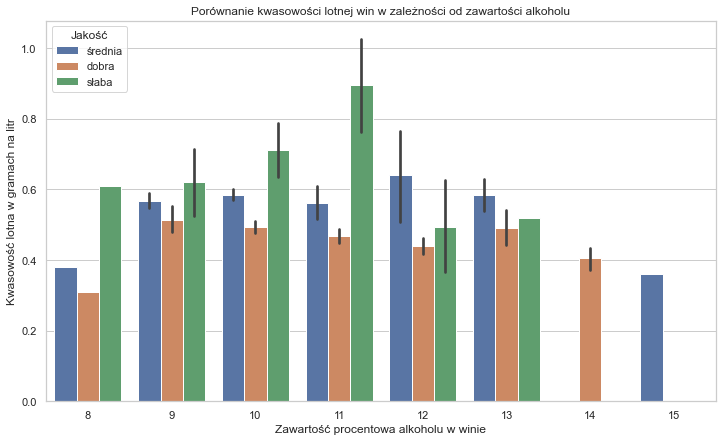

In [11]:
df2 = df[["volatile acidity","quality","alcohol"]]
df2["Jakość"] = [None]*len(df2)
df2["round_%"]= [None]*len(df2)
for i in range(0,len(df2)-1):
    if df2["quality"][i] > 5:
        df2["Jakość"][i] = "dobra"
    if df2["quality"][i] < 5:
        df2["Jakość"][i] = "słaba"
    if df2["quality"][i] == 5:
        df2["Jakość"][i] = "średnia"
    df2["round_%"][i] = int("%.0f" % df2["alcohol"][i])

df2 = df2.dropna()
sns.set_style("whitegrid")
bar1 = sns.barplot(x="round_%", y="volatile acidity", data=df2, hue="Jakość")
bar1.set_title("Porównanie kwasowości lotnej win w zależności od zawartości alkoholu")
bar1.set_xlabel("Zawartość procentowa alkoholu w winie")
bar1.set_ylabel("Kwasowość lotna w gramach na litr")
plt.show()

Na podstawie wykresu można zauważyć, że wina, których jakość została oceniona jako słaba, charakteryzują się wysoką kwasowością lotną. Może to wynikać z faktu, że te wina mają nieprzyjemny zapach podobny do typowego sosu sałatkowego. Ponadto, można wywnioskować, że wina dobrej jakości mają w większości podobną wartość kwasowości lotnej wachjącą się między 0.5 a 0.6 gramów na litr. Natomiast u win słabej jakości wartości kwasowości lotnej bardzo się różnią w zależności od zawartości alkoholu.

Kolejną cechą względem której przeanalizowano zbiór danych jest zawartośc chlorków w winie. Wyróżniono grupę 100 win o najmniejszej ilości chlorków w składzie i na wykresie przedstawiono zależność między zawartością cukru a gęstością dla tych win.

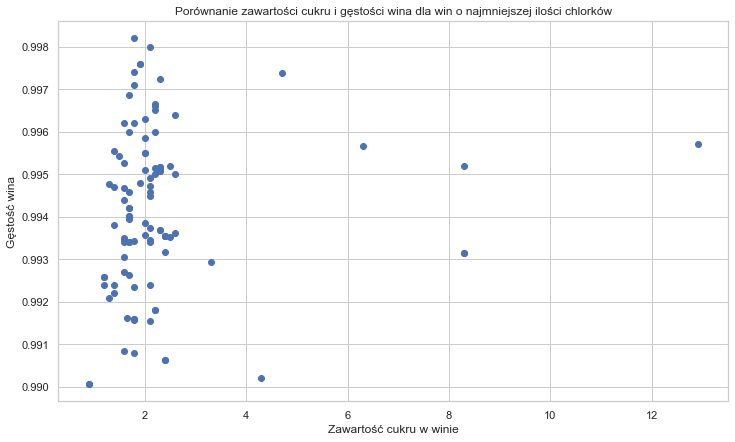

In [12]:
df3 = df[["chlorides","residual sugar","density"]]
df3 = df3.reset_index()
n_row = df3["chlorides"].sort_values(ascending = True).head(100).to_frame()
n_row = n_row.reset_index()
df3 = df3.merge(n_row, on = "index")

plt.scatter(df3["residual sugar"], df3["density"])
plt.title("Porównanie zawartości cukru i gęstości wina dla win o najmniejszej ilości chlorków")
plt.xlabel("Zawartość cukru w winie")
plt.ylabel("Gęstość wina")
plt.show()

Na podstawie wykresu można wywnioskować, że wina o małej zawartości chlorków, czyli wina mało gazowane, mają średnio niską zawartość cukru. Dodatkowo, dla tych win wartości gęstości są różne i nie da się zaobserwować pod tym względem zależności.